In [ ]:
#pip install control

In [ ]:
import matplotlib .pyplot as plt
import control as ct
import numpy as np
import scipy as scipy

ModuleNotFoundError: No module named 'control'

In [ ]:
def plot_bode(x, Y1, Y2, legends, title, xlabels, ylabels, xPoint):
    # Plot setup
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)

    plt.semilogx(x, 20 * np.log10(Y1))
    for i in range(len(xPoint)):
        if (i == 0):
            plt.axvline(x = xPoint[i], color='r')  # Vertical line
        elif (i == 1):
            plt.axvline(x = xPoint[i], color='b')  # Vertical line
        else:
            plt.axvline(x = xPoint[i], color='k')  # Vertical line
    plt.xscale('log')  # Ensuring x-axis is logarithmic

    # Legend setup
    plt.legend(legends)

    # Grid, labels, and title
    plt.ylabel(ylabels[0])
    # plt.xlabel(xlabels[0])
    plt.grid(True)

    plt.title(title[0])
    # plt.yticks(np.arange(-20, 101, 20))  # Setting y-ticks from -20 to 100 with a step of 20


    # Phase plot
    plt.subplot(2, 1, 2)
    plt.semilogx(x, Y2 * (180/np.pi))
    for i in range(len(xPoint)):
        if (i == 0):
            plt.axvline(x = xPoint[i], color='r')  # Vertical line
        elif (i == 1):
            plt.axvline(x = xPoint[i], color='b')  # Vertical line
        else:
            plt.axvline(x = xPoint[i], color='k')  # Vertical line

    plt.ylabel(ylabels[1])
    plt.xlabel(xlabels[1])
    plt.grid(True)
    plt.show()

In [ ]:
# w = np.linspace(10, int(1e6), 10)  # from 10 to 10e7 Hz
w = np.logspace(1, 6, 500)  # Adjust the range as necessary

In [ ]:
# Parâmetros da senoide
frequencia = 60  # Frequência da senoide em Hz
wz = frequencia * 2 * np.pi # # Frequência da senoide em rad/s

amplitude = 100  # Amplitude da senoide
tempo = 0.1  # Duração em segundos
frequencia_amostragem = 20000  # Frequência de amostragem em Hz

# Gerar o vetor de tempo
t = np.linspace(0, tempo, int(frequencia_amostragem * tempo), endpoint=False)

# Gerar a senoide
senoide = amplitude * np.sin(2 * np.pi * frequencia * t) + 0.2 * amplitude * np.sin(10 * 2 * np.pi * frequencia * t) + 0.02 * amplitude * np.sin(20 * 2 * np.pi * frequencia * t)

senoide_60_hz = amplitude * np.sin(2 * np.pi * frequencia * t)

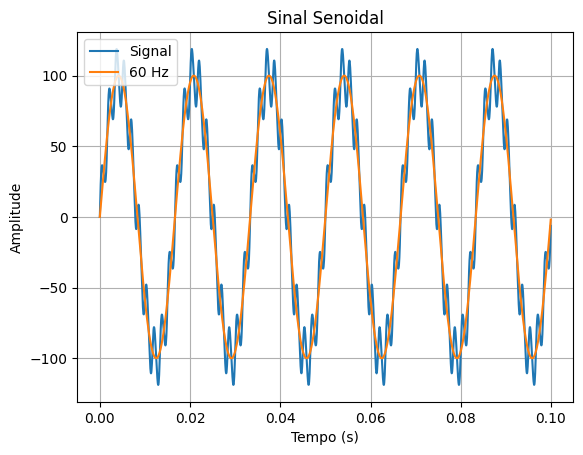

In [ ]:
# Plotar a senoide
plt.plot(t, senoide, label = "Signal")
plt.plot(t, senoide_60_hz, label = "60 Hz")
plt.title("Sinal Senoidal")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
R1 = 2

R2 = 7

# Frequency Hz
F1_hz = 10

# Grid Frequency rad/s
w1_hz = F1_hz * 2 * np.pi

# Frequency Hz
F2_hz = 1000

# Grid Frequency rad/s
w2_hz = F2_hz * 2 * np.pi

#  Io(s) p/ d(s)
num_TF_G = [R2]
den_TF_G = [R1 + R2]

In [ ]:
sys_G = ct.tf(num_TF_G,den_TF_G)

In [ ]:
# Simular a resposta do sistema sys_G com a entrada sendo a senoide
t_out, y_out = ct.forced_response(sys_G, T=t, U=senoide)

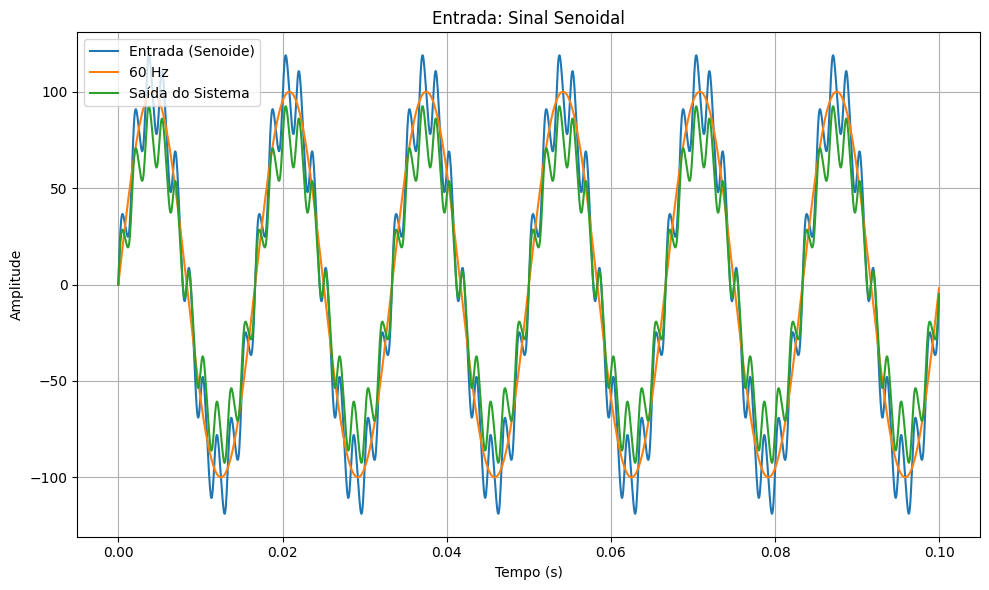

In [ ]:
# Plotar a entrada (senoide) e a saída do sistema
plt.figure(figsize=(10, 6))

plt.plot(t, senoide, label='Entrada (Senoide)')
plt.plot(t, senoide_60_hz, label = "60 Hz")
plt.plot(t_out, y_out, label='Saída do Sistema')
plt.title('Entrada: Sinal Senoidal')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
sys_G = ct.tf(num_TF_G,den_TF_G)

# Function ‘freqs’ gives the frequency response in the s-domain
w, Y1 = scipy.signal.freqs(num_TF_G, den_TF_G, w)

# Compute magnitude and phase
y1 = abs(Y1)
y2 = np.angle(Y1)

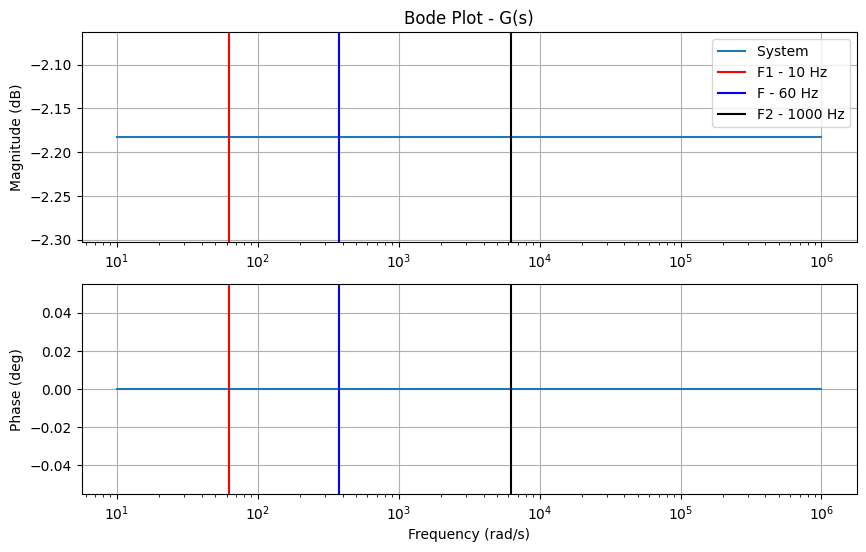

In [ ]:
legend1 = f'System '
legend2 = f'F1 - {F1_hz:.0f} Hz'
legend3 = f'F - {frequencia:.0f} Hz'
legend4 = f'F2 - {F2_hz:.0f} Hz'
legends = [legend1, legend2, legend3, legend4]

title = ['Bode Plot - G(s)', '']
xlabels = ['Frequency (rad/s)', 'Frequency (rad/s)']
ylabels = ['Magnitude (dB)', 'Phase (deg)']
plot_bode(w, y1, y2, legends, title, xlabels, ylabels, xPoint = [w1_hz, wz, w2_hz])

In [ ]:
mag_G, phase_G, omega_G = ct.frequency_response(sys_G, [wz])

print(mag_G)
print(phase_G *180 / np.pi)

[0.77777778]
[0.]


In [ ]:
Vdc = 1

Ro = 7

Lo = 0.1

# Frequency Hz
F1_hz = 10

# Grid Frequency rad/s
w1_hz = F1_hz * 2 * np.pi

# Frequency Hz
F2_hz = 1000

# Grid Frequency rad/s
w2_hz = F2_hz * 2 * np.pi

#  Io(s) p/ d(s)
num_TF_G = [Ro * Vdc]
den_TF_G = [Lo, Ro]

In [ ]:
sys_G = ct.tf(num_TF_G,den_TF_G)

# Function ‘freqs’ gives the frequency response in the s-domain
w, Y1 = scipy.signal.freqs(num_TF_G, den_TF_G, w)

# Compute magnitude and phase
y1 = abs(Y1)
y2 = np.angle(Y1)

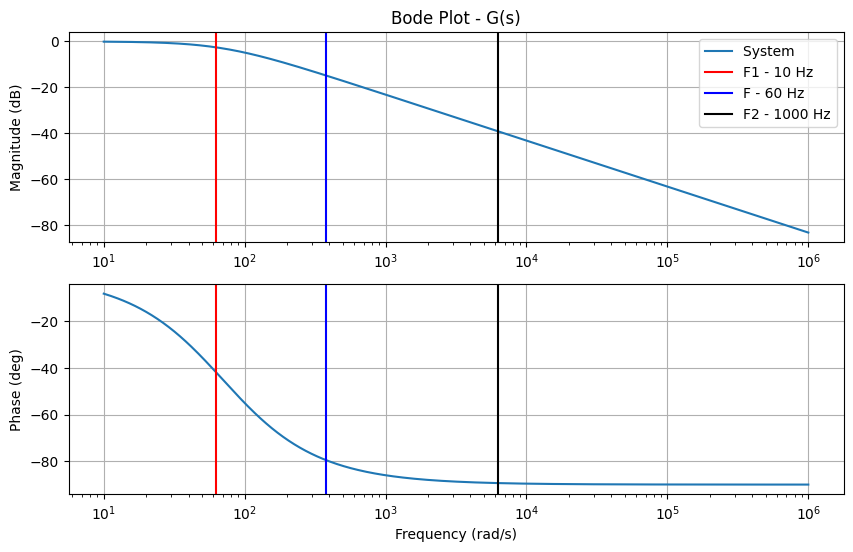

In [ ]:
legend1 = f'System '
legend2 = f'F1 - {F1_hz:.0f} Hz'
legend3 = f'F - {frequencia:.0f} Hz'
legend4 = f'F2 - {F2_hz:.0f} Hz'
legends = [legend1, legend2, legend3, legend4]

title = ['Bode Plot - G(s)', '']
xlabels = ['Frequency (rad/s)', 'Frequency (rad/s)']
ylabels = ['Magnitude (dB)', 'Phase (deg)']
plot_bode(w, y1, y2, legends, title, xlabels, ylabels, xPoint = [w1_hz, wz, w2_hz])


In [ ]:
mag_G, phase_G, omega_G = ct.frequency_response(sys_G, [wz])

print(mag_G)
print(phase_G *180 / np.pi)

[0.18256034]
[-79.48107215]


In [ ]:
# Simular a resposta do sistema sys_G com a entrada sendo a senoide
t_out, y_out = ct.forced_response(sys_G, T=t, U=senoide)

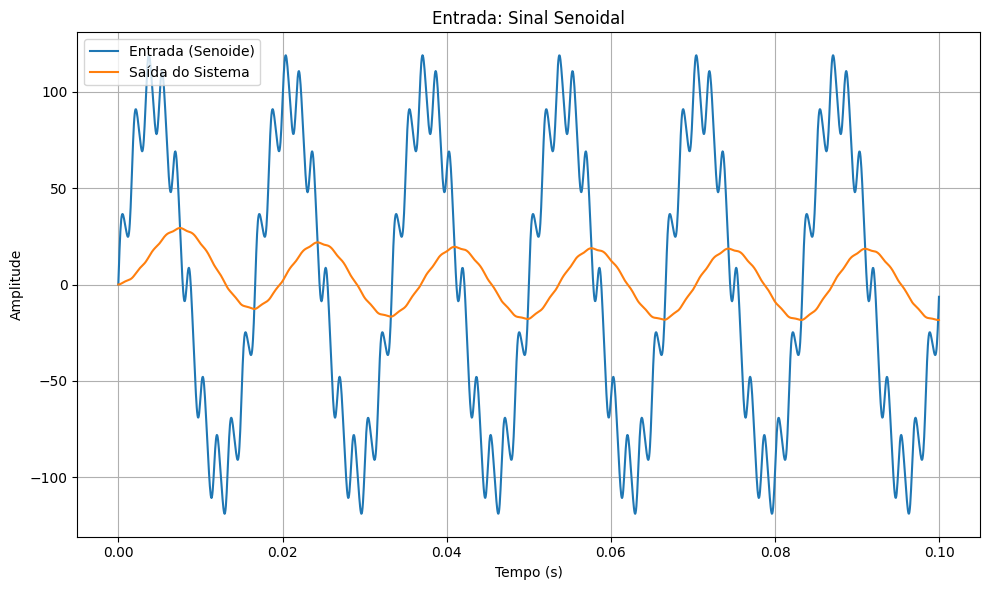

In [ ]:
# Plotar a entrada (senoide) e a saída do sistema
plt.figure(figsize=(10, 6))

plt.plot(t, senoide, label='Entrada (Senoide)')
#plt.plot(t, senoide_60_hz, label = "60 Hz")
plt.plot(t_out, y_out, label='Saída do Sistema')
plt.title('Entrada: Sinal Senoidal')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
Ro = 7

Co = 0.00001

# Frequency Hz
F1_hz = 10

# Grid Frequency rad/s
w1_hz = F1_hz * 2 * np.pi

# Frequency Hz
F2_hz = 1000

# Grid Frequency rad/s
w2_hz = F2_hz * 2 * np.pi

#  Io(s) p/ d(s)
num_TF_G = [Ro*Co,  0]
den_TF_G = [Ro*Co, 1]

In [ ]:
sys_G = ct.tf(num_TF_G,den_TF_G)

# Function ‘freqs’ gives the frequency response in the s-domain
w, Y1 = scipy.signal.freqs(num_TF_G, den_TF_G, w)

# Compute magnitude and phase
y1 = abs(Y1)
y2 = np.angle(Y1)

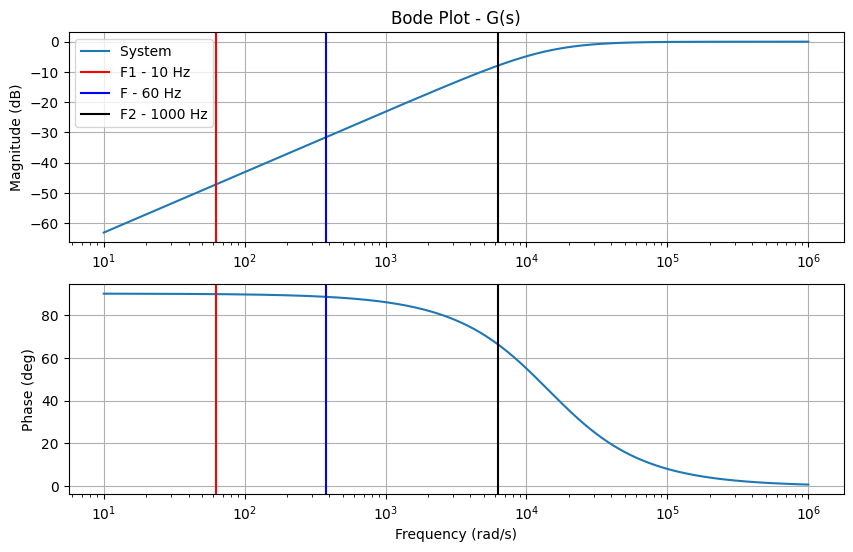

In [ ]:
legend1 = f'System '
legend2 = f'F1 - {F1_hz:.0f} Hz'
legend3 = f'F - {frequencia:.0f} Hz'
legend4 = f'F2 - {F2_hz:.0f} Hz'
legends = [legend1, legend2, legend3, legend4]

title = ['Bode Plot - G(s)', '']
xlabels = ['Frequency (rad/s)', 'Frequency (rad/s)']
ylabels = ['Magnitude (dB)', 'Phase (deg)']
plot_bode(w, y1, y2, legends, title, xlabels, ylabels, xPoint = [w1_hz, wz, w2_hz])


In [ ]:
# Simular a resposta do sistema sys_G com a entrada sendo a senoide
t_out, y_out = ct.forced_response(sys_G, T=t, U=senoide)

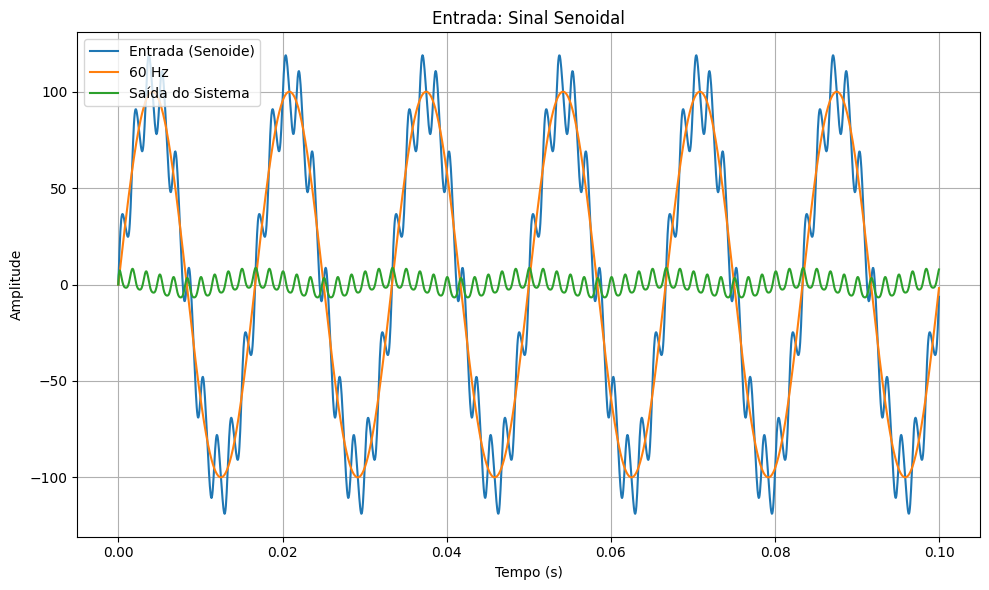

In [ ]:
# Plotar a entrada (senoide) e a saída do sistema
plt.figure(figsize=(10, 6))

plt.plot(t, senoide, label='Entrada (Senoide)')
plt.plot(t, senoide_60_hz, label = "60 Hz")
plt.plot(t_out, y_out, label='Saída do Sistema')
plt.title('Entrada: Sinal Senoidal')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
Ro = 7

Co = 0.0001

Lo = 0.1

# Frequency Hz
F1_hz = 10

# Grid Frequency rad/s
w1_hz = F1_hz * 2 * np.pi

# Frequency Hz
F2_hz = 1000

# Grid Frequency rad/s
w2_hz = F2_hz * 2 * np.pi

#  Io(s) p/ d(s)
num_TF_G = [Ro]
den_TF_G = [Lo * Ro * Co , Lo , Ro]

In [ ]:
sys_G = ct.tf(num_TF_G,den_TF_G)

# Function ‘freqs’ gives the frequency response in the s-domain
w, Y1 = scipy.signal.freqs(num_TF_G, den_TF_G, w)

# Compute magnitude and phase
y1 = abs(Y1)
y2 = np.angle(Y1)

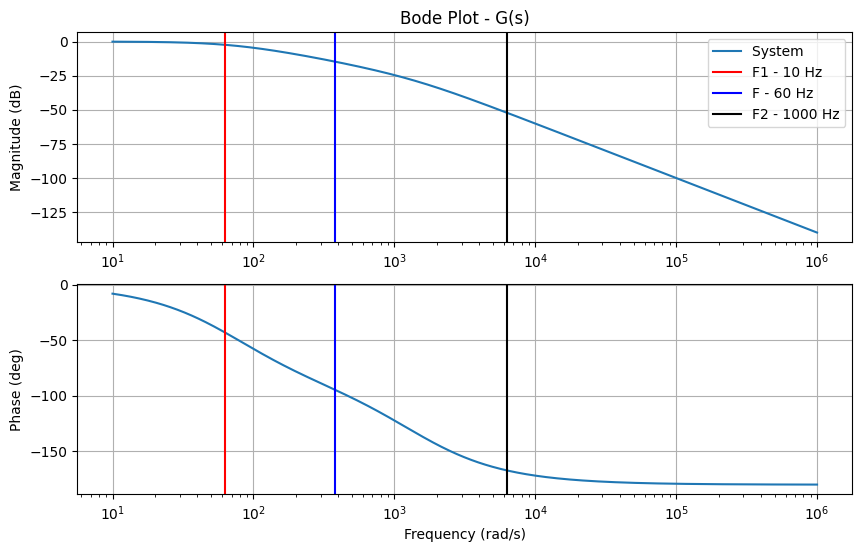

In [ ]:
legend1 = f'System '
legend2 = f'F1 - {F1_hz:.0f} Hz'
legend3 = f'F - {frequencia:.0f} Hz'
legend4 = f'F2 - {F2_hz:.0f} Hz'
legends = [legend1, legend2, legend3, legend4]

title = ['Bode Plot - G(s)', '']
xlabels = ['Frequency (rad/s)', 'Frequency (rad/s)']
ylabels = ['Magnitude (dB)', 'Phase (deg)']
plot_bode(w, y1, y2, legends, title, xlabels, ylabels, xPoint = [w1_hz, wz, w2_hz])


In [ ]:
# Simular a resposta do sistema sys_G com a entrada sendo a senoide
t_out, y_out = ct.forced_response(sys_G, T=t, U=senoide)

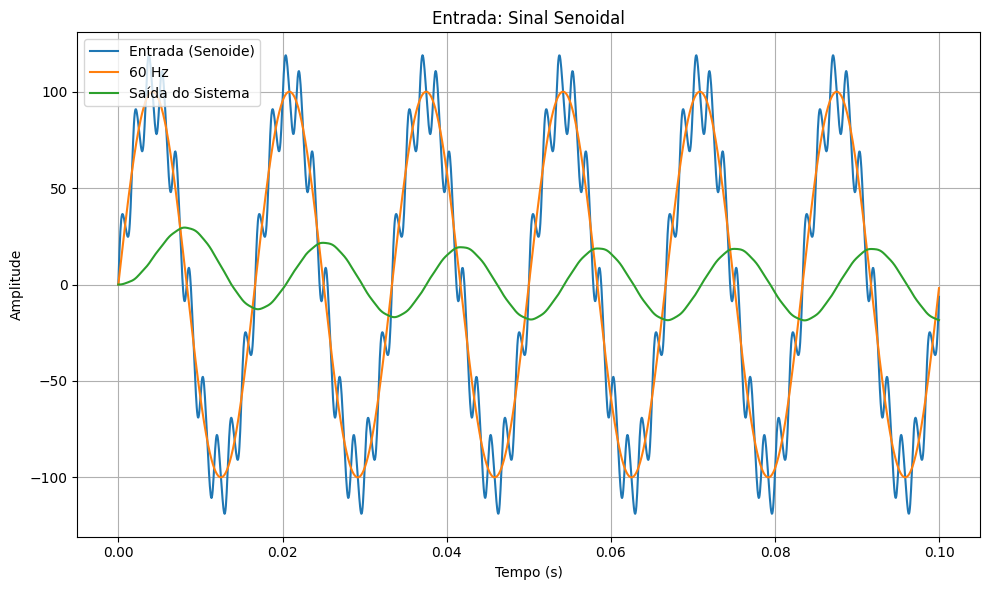

In [ ]:
# Plotar a entrada (senoide) e a saída do sistema
plt.figure(figsize=(10, 6))

plt.plot(t, senoide, label='Entrada (Senoide)')
plt.plot(t, senoide_60_hz, label = "60 Hz")
plt.plot(t_out, y_out, label='Saída do Sistema')
plt.title('Entrada: Sinal Senoidal')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
R1 = 2

R2 = 7

Co = 0.0001

Lo = 0.1

# Frequency Hz
F1_hz = 10

# Grid Frequency rad/s
w1_hz = F1_hz * 2 * np.pi

# Frequency Hz
F2_hz = 1000

# Grid Frequency rad/s
w2_hz = F2_hz * 2 * np.pi

#  Io(s) p/ d(s)
num_TF_G = [R1]
den_TF_G = [Lo * (R1+R2) * Co , Lo , (R1+R2)]

In [ ]:
sys_G = ct.tf(num_TF_G,den_TF_G)

# Function ‘freqs’ gives the frequency response in the s-domain
w, Y1 = scipy.signal.freqs(num_TF_G, den_TF_G, w)

# Compute magnitude and phase
y1 = abs(Y1)
y2 = np.angle(Y1)

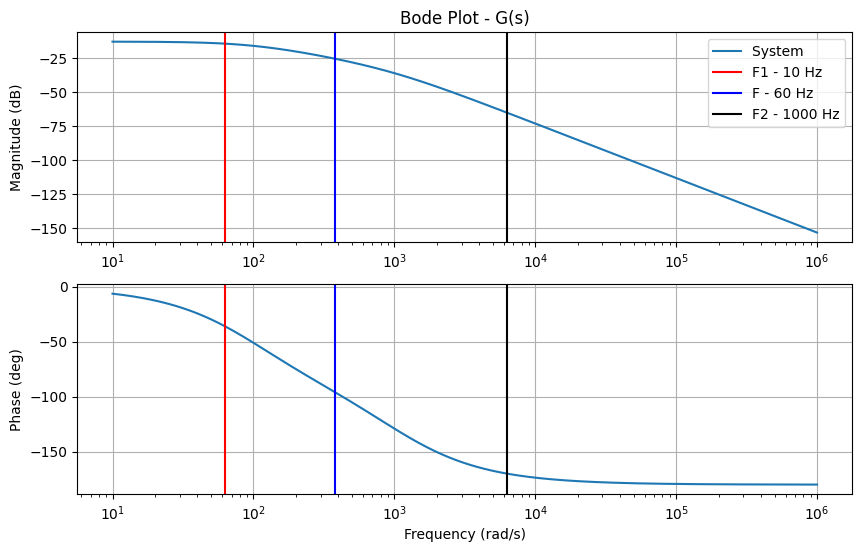

In [ ]:
legend1 = f'System '
legend2 = f'F1 - {F1_hz:.0f} Hz'
legend3 = f'F - {frequencia:.0f} Hz'
legend4 = f'F2 - {F2_hz:.0f} Hz'
legends = [legend1, legend2, legend3, legend4]

title = ['Bode Plot - G(s)', '']
xlabels = ['Frequency (rad/s)', 'Frequency (rad/s)']
ylabels = ['Magnitude (dB)', 'Phase (deg)']
plot_bode(w, y1, y2, legends, title, xlabels, ylabels, xPoint = [w1_hz, wz, w2_hz])


In [ ]:
# Simular a resposta do sistema sys_G com a entrada sendo a senoide
t_out, y_out = ct.forced_response(sys_G, T=t, U=senoide)

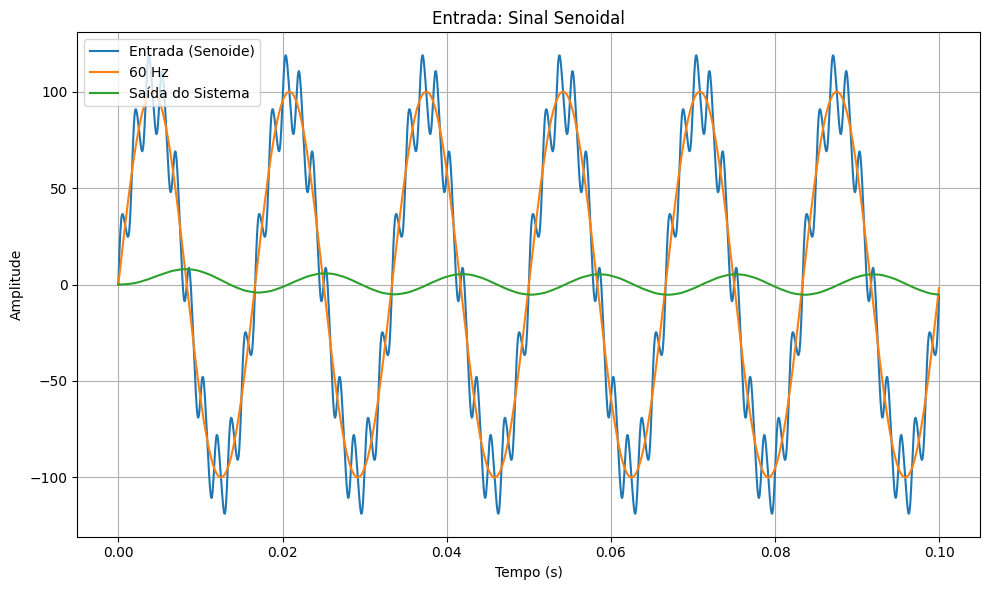

In [ ]:
# Plotar a entrada (senoide) e a saída do sistema
plt.figure(figsize=(10, 6))

plt.plot(t, senoide, label='Entrada (Senoide)')
plt.plot(t, senoide_60_hz, label = "60 Hz")
plt.plot(t_out, y_out, label='Saída do Sistema')
plt.title('Entrada: Sinal Senoidal')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()